In [1]:
import torch
from moldatapro import Dataprocess

In [38]:
data = Dataprocess()
data.generate('../ourdata/prolin_dataset.sdf')

a_tensor = torch.from_numpy(data.adj) # Adjacency.
x_tensor = torch.from_numpy(data.x)  # Nodes.
atomic_num_list = data.atomic_num_list
condition_tensor = torch.from_numpy(data.condition)

batch_size = 32
max_iter = int(x_tensor.shape[0]/batch_size)
dataloader = []
for i in range(max_iter):
    batch = []
    x = x_tensor[i*batch_size:(i+1)*batch_size]  # (256,9,5)
    adj = a_tensor[i*batch_size:(i+1)*batch_size]  # (256,4,9, 9)
    condition = condition_tensor[i*batch_size:(i+1)*batch_size]
    batch.append(x)
    batch.append(adj)
    batch.append(condition)
    dataloader.append(batch)

batch = []
x = x_tensor[(max_iter*batch_size):]  # (256,9,5)
adj = a_tensor[(max_iter*batch_size):]  # (256,4,9, 9)
condition = condition_tensor[(max_iter*batch_size):]
batch.append(x)
batch.append(adj)
batch.append(condition)
dataloader.append(batch)

2020-12-04 14:02:37 the node type are [5, 6, 7, 8, 9, 14, 15, 16, 17, 35, 0]
2020-12-04 14:02:37 Created atoms encoder and decoder with 10 atom types and 1 PAD symbol!
2020-12-04 14:02:37 the bond type of this data are [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.DOUBLE, rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.ZERO]
2020-12-04 14:02:37 Created bonds encoder and decoder with 3 bond types and 1 PAD symbol!
2020-12-04 14:02:37 max length of mol is 42


In [53]:
x = data.construct_atomic_number_array()
a = data.construct_discrete_edge_matrix()

In [66]:
a[0][3][4]

array([0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [69]:
import torch
import torch.nn as nn

In [70]:
a = nn.Embedding(2,3)

In [84]:
b = torch.ones(10).long()
c = a(b)

In [86]:
c.shape

torch.Size([10, 3])

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# 兼容pdf输出
# matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.use('PDF')
# from matplotlib.backends.backend_pdf import PdfPages
# # 使用Type 42字体来生成PostScript 和PDF 文件.
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
# # 强制生成Type 1 fonts, 不过可能会改变图形
# matplotlib.rcParams['text.usetex'] = True

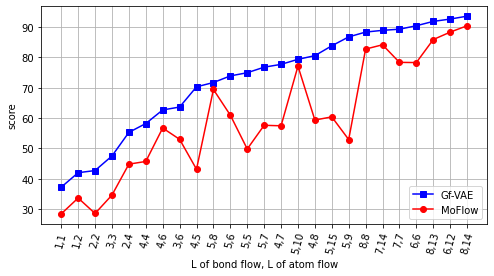

In [2]:
df = pd.read_csv('../timeresult.csv')
df = df.sort_values(by='s')
score_our = list(df['s'])
x_our = df['qm9']
score_orig = list(df['s.1'])
x_orig = df['qm9']
score_orig = [round(i/100,2) for i in score_orig]
score_our = [round(i/100,2) for i in score_our]
plt.figure(figsize=(8,4))
plt.plot(x_our,score_our,'s-',c='b',label='Gf-VAE')
plt.plot(x_orig,score_orig,'o-',c='r',label='MoFlow')
# plt.annotate('', xy=(x_our[-1],score_our[-1]),xytext=(x_our[-2:-1],score_our[-2:-1]),
#                          arrowprops=dict(arrowstyle='->',
#                              color=color2,
#                              shrinkB=0))
plt.xticks(rotation=75)
plt.xlabel('L of bond flow, L of atom flow')
plt.ylabel('score')
plt.grid()
plt.legend(loc='lower right')
plt.savefig('timeline1')
# plt.savefig('timeline1.eps',format='eps')
# plt.savefig('timeline1.pdf',bbox_inches='tight')
plt.show()

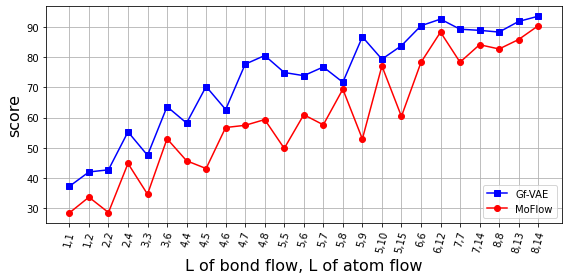

In [3]:
df = pd.read_csv('../timeresult.csv')
# df = df.sort_values(by='s')
score_our = list(df['s'])
x_our = df['qm9']
score_orig = list(df['s.1'])
x_orig = df['qm9']
score_orig = [round(i/100,2) for i in score_orig]
score_our = [round(i/100,2) for i in score_our]
plt.figure(figsize=(8,4))
plt.plot(x_our,score_our,'s-',c='b',label='Gf-VAE')
plt.plot(x_orig,score_orig,'o-',c='r',label='MoFlow')
# plt.annotate('', xy=(x_our[-1],score_our[-1]),xytext=(x_our[-2:-1],score_our[-2:-1]),
#                          arrowprops=dict(arrowstyle='->',
#                              color=color2,
#                              shrinkB=0))
plt.xticks(rotation=75)
plt.xlabel('L of bond flow, L of atom flow',fontsize=16)
plt.ylabel('score',fontsize=16)
plt.grid()
plt.legend(loc='lower right')
plt.title('')
plt.tight_layout()
plt.savefig('timeline1')
# plt.savefig('timeline1.eps',format='eps')
# plt.savefig('timeline1.pdf',bbox_inches='tight')
plt.show()

In [4]:
path = 'results/zinc250k_model_small_size/'
path1 = '../../test/moflow/mflow/results/zinc250k_model_small_size/'

s = []
s1 = []

ss = []
ss1 = []

sss=[]
sss1=[]

with open(path+'zinc_1_3/unique.txt','r') as f:
    for line in f.readlines():
        s.append(float(line.strip()))
with open(path1+'zinc_1_3/unique.txt','r') as f:
    for line in f.readlines():
        s1.append(float(line.strip()))
        
with open(path+'zinc_2_6/unique.txt','r') as f:
    for line in f.readlines():
        ss.append(float(line.strip()))
with open(path1+'zinc_2_6/unique.txt','r') as f:
    for line in f.readlines():
        ss1.append(float(line.strip()))
        
with open(path+'zinc_3_9/unique.txt','r') as f:
    for line in f.readlines():
        sss.append(float(line.strip()))
with open(path1+'zinc_3_9/unique.txt','r') as f:
    for line in f.readlines():
        sss1.append(float(line.strip()))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


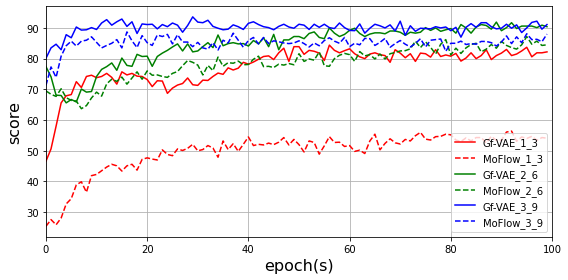

In [5]:
plt.figure(figsize=(8,4))
plt.plot(range(100),s,'r-',linewidth=1.5,label='Gf-VAE_1_3')
plt.plot(range(100),s1,'r--',linewidth=1.5,label='MoFlow_1_3')
plt.plot(range(100),ss,'g-',linewidth=1.5,label='Gf-VAE_2_6')
plt.plot(range(100),ss1,'g--',linewidth=1.5,label='MoFlow_2_6')
plt.plot(range(100),sss,'b-',linewidth=1.5,label='Gf-VAE_3_9')
plt.plot(range(100),sss1,'b--',linewidth=1.5,label='MoFlow_3_9')
plt.xlabel('epoch(s)',fontsize=16)
plt.ylabel('score',fontsize=16)
plt.xlim(0,100)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('timeline2')
plt.savefig('timeline2.eps',format='eps')
# plt.savefig('timeline2.pdf',bbox_inches='tight')
plt.show()

In [1]:
from rdkit.Chem import Draw
# from IPython.display import SVG, display
from IPython.core.display import display_svg
from rdkit import Chem
import pandas as pd
import cairosvg

RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
/home/mac0c/anaconda3/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  % (maxMols))


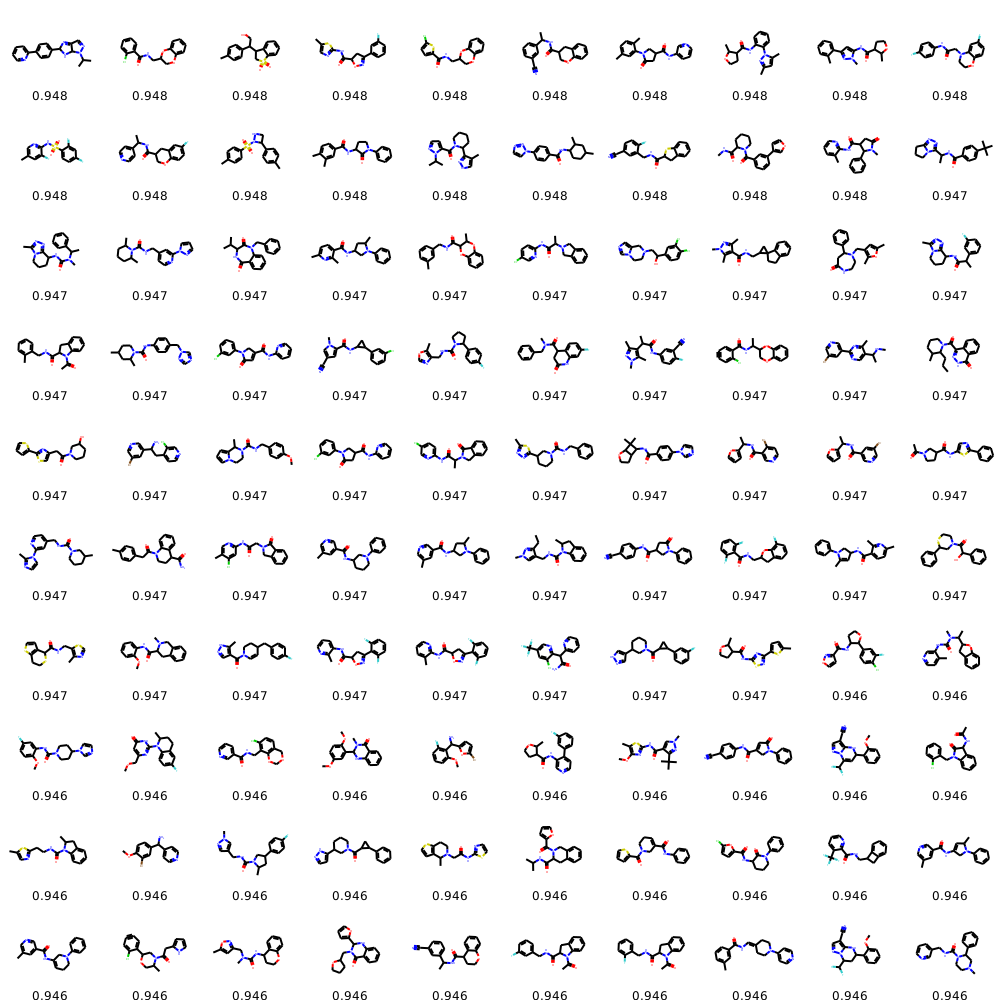

In [5]:
path = 'results/zinc250k_datatest_5_15/'
head = ['score', 'smile', 'sim', 'smile_original']
# plogp_discovered_sorted.csv
qed = pd.read_csv(path + 'zinc_qed_discovered_sorted.csv',names=head)
mols = list(qed['smile'])
mols = [Chem.MolFromSmiles(mol) for mol in mols]
title = [str(round(s,3)) for s in list(qed['score'])]
img=Draw.MolsToGridImage(mols, legends=title, molsPerRow=10, maxMols=100, subImgSize=(100,100))
# print(type(img))
# cairosvg.svg2png(bytestring=img.encode('utf-8'), write_to="top_qed2.png")
img.save("top_qed2.png")
img

RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:21] WARNING: could not find number of expected rings. Switching to an approximate 

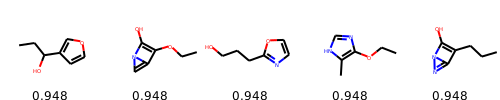

In [6]:
path = 'results/qm9_datatest_5_13/'
head = ['score', 'smile', 'sim', 'smile_original']
# plogp_discovered_sorted.csv
qed1 = pd.read_csv(path + 'qm9_qed_discovered_sorted.csv',names=head)
mols1 = list(qed1['smile'])
mols1 = [Chem.MolFromSmiles(mol) for mol in mols1]
title1 = [str(round(s,3)) for s in list(qed1['score'])]
img1=Draw.MolsToGridImage(mols1, legends=title, molsPerRow=5, maxMols=5, subImgSize=(100,100))
img1.save('top_qed1.png')
img1

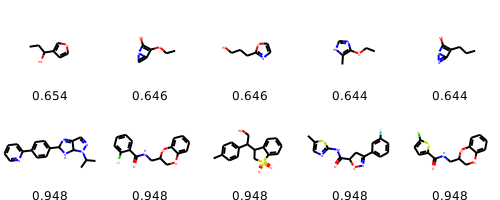

In [7]:
mm = mols1[:5] + mols[:5]
tt = title1[:5] + title[:5] 
img2=Draw.MolsToGridImage(mm, legends=tt, molsPerRow=5, maxMols=10, subImgSize=(100,100))
img2.save('qed.png')
img2

RDKit WARNING: [07:01:44] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


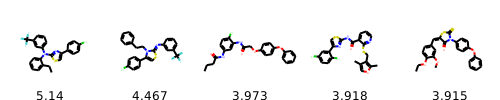

In [12]:
path = 'results/zinc250k_datatest_5_15/'
plogp = pd.read_csv(path + 'plogp_discovered_sorted.csv',names=head)
mols = list(plogp['smile'])
mols = [Chem.MolFromSmiles(mol) for mol in mols]
title = [str(round(s,3)) for s in list(plogp['score'])]
img=Draw.MolsToGridImage(mols, legends=title, molsPerRow=5, maxMols=5, subImgSize=(100,100))
img.save('top_plogp2.png')
img

RDKit WARNING: [06:56:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [06:56:26] WARNING: could not find number of expected rings. Switching to an approximate 

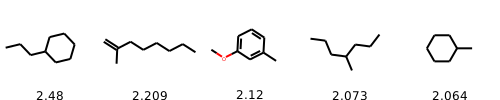

In [9]:
path = 'results/qm9_datatest_5_13/'
plogp = pd.read_csv(path + 'qm9_plogp_discovered_sorted.csv',names=head)
mols1 = list(plogp['smile'])
mols1 = [Chem.MolFromSmiles(mol) for mol in mols1]
title1 = [str(round(s,3)) for s in list(plogp['score'])]
img=Draw.MolsToGridImage(mols1[1:], legends=title1[1:], molsPerRow=5, maxMols=5, subImgSize=(100,100))
img.save('top_plogp1.png')
img

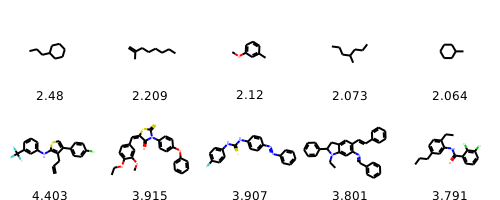

In [10]:
mm = mols1[1:6] + mols[3:8]
tt = title1[1:6] + title[3:8] 
img2=Draw.MolsToGridImage(mm, legends=tt, molsPerRow=5, maxMols=10, subImgSize=(100,100))
img2.save('plogp.png')
img2

RDKit WARNING: [18:50:24] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [18:50:24] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [18:50:24] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [18:50:24] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [18:50:24] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [18:50:24] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [18:50:24] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [18:50:24] WARNING: could not find number of expected rings. Switching to an approximate 

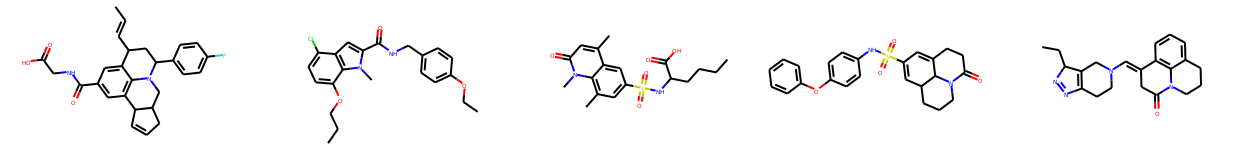

In [63]:
path = 'results/zinc250k_datatest_5_15/'
# head = ['smile_new', 'prop_new', 'sim', 'smile_old', 'qed_old', 'plogp_old', 'plogp_delta']
# plogp_discovered_sorted.csv
qed = pd.read_csv(path + 'plogp_constrain_optimization.csv')
qed['total'] = abs(qed['sim'] * qed['plogp_delta'])
qed = qed.sort_values(by='total', ascending=False)
mols = list(qed['smile_new'])
mols = [Chem.MolFromSmiles(mol) for mol in mols]
title = [str(round(s,3)) for s in list(qed['prop_new'])]
img=Draw.MolsToGridImage(mols, molsPerRow=5, maxMols=5, subImgSize=(250,150))
img.save('cplog2.png')
img

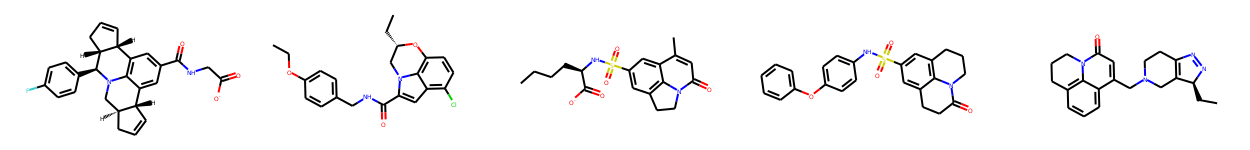

In [62]:
mols = list(qed['smile_old'])
mols = [Chem.MolFromSmiles(mol) for mol in mols]
title = [str(round(s,3)) for s in list(qed['plogp_old'])]
img=Draw.MolsToGridImage(mols, molsPerRow=5, maxMols=5, subImgSize=(250,150))
img.save('cplog1.png')
img

In [42]:
qed[:5]

,smile_new,prop_new,sim,smile_old,qed_old,plogp_old,plogp_delta,total
30,CC=CC1CC(c2ccc(F)cc2)N2CC3CC=CC3c3cc(C(=O)NCC(...,0.481379,0.615385,O=C([O-])CNC(=O)c1cc2c3c(c1)[C@@H]1C=CC[C@H]1C...,0.737038,-21.969770,22.451149,13.816092
178,CCCOc1ccc(Cl)c2cc(C(=O)NCc3ccc(OCC)cc3)n(C)c12,2.905242,0.639175,CCOc1ccc(CNC(=O)c2cc3c(Cl)ccc4c3n2C[C@H](CC)O4...,0.648793,-15.534605,18.439847,11.786294
68,CCCCC(NS(=O)(=O)c1cc(C)c2c(c1)c(C)cc(=O)n2C)C(...,0.076303,0.609195,CCCC[C@@H](NS(=O)(=O)c1cc2c3c(c1)c(C)cc(=O)n3C...,0.753731,-19.101792,19.178095,11.683207
80,O=C1CCC2=CC(S(=O)(=O)Nc3ccc(Oc4ccccc4)cc3)=CC3...,0.975131,0.592920,O=C1CCc2cc(S(=O)(=O)Nc3ccc(Oc4ccccc4)cc3)cc3c2...,0.641333,-18.452731,19.427862,11.519175
44,CCC1N=NC2=C1CN(C=C1CC(=O)N3CCCc4cccc1c43)CC2,-0.115250,0.535354,CC[C@@H]1N=NC2=C1CN(Cc1cc(=O)n3c4c(cccc14)CCC3...,0.849967,-20.692882,20.577632,11.016308


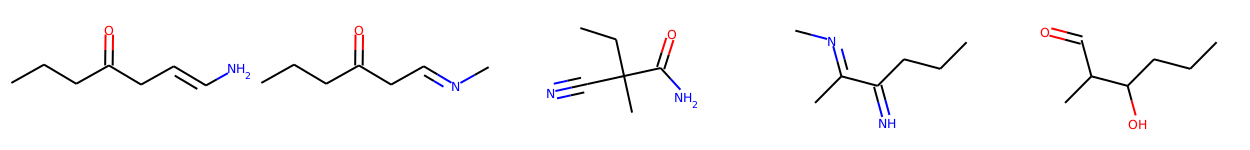

In [64]:
path = 'results/qm9_datatest_5_13/'
# head = ['smile_new', 'prop_new', 'sim', 'smile_old', 'qed_old', 'plogp_old', 'plogp_delta']
# plogp_discovered_sorted.csv
qed = pd.read_csv(path + 'qed_constrain_optimization.csv')
qed['qed_delta'] = qed['prop_new'] - qed['qed_old']
qed['total'] = abs(qed['sim'] * qed['qed_delta'])
qed = qed.sort_values(by='total', ascending=False)
mols = list(qed['smile_new'])
mols = [Chem.MolFromSmiles(mol) for mol in mols]
title = [str(round(s,3)) for s in list(qed['prop_new'])]
img=Draw.MolsToGridImage(mols, molsPerRow=5, maxMols=5, subImgSize=(250,150))
img.save('cqed2.png')
img

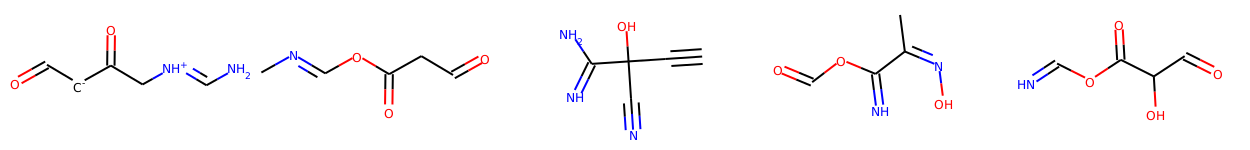

In [65]:
mols = list(qed['smile_old'])
mols = [Chem.MolFromSmiles(mol) for mol in mols]
title = [str(round(s,3)) for s in list(qed['qed_old'])]
img=Draw.MolsToGridImage(mols, molsPerRow=5, maxMols=5, subImgSize=(250,150))
img.save('cqed1.png')
img

In [45]:
qed

,smile_new,prop_new,sim,smile_old,qed_old,plogp_old,plogp_delta,qed_delta,total
5,CCCC(=O)CC=CN,0.616599,0.200000,NC=[NH+]CC(=O)[CH-]C=O,0.139460,-7.258383,7.874983,0.477139,0.095428
73,CCCC(=O)CC=NC,0.525359,0.263158,CN=COC(=O)CC=O,0.173849,-2.735067,3.260426,0.351510,0.092503
85,CCC(C)(C#N)C(N)=O,0.581929,0.222222,NC(=N)C(O)(C#C)C#N,0.176962,-4.475939,5.057868,0.404967,0.089993
99,CCCC(=N)C(C)=NC,0.560592,0.210526,CC(=NO)C(=N)OC=O,0.181104,-2.825924,3.386516,0.379487,0.079892
36,CCCC(O)C(C)C=O,0.575900,0.179487,OC(C=O)C(=O)OC=N,0.163636,-4.342294,4.918194,0.412263,0.073996
...,...,...,...,...,...,...,...,...,...
29,CCCC12N3NC14OC342,0.516285,0.000000,NC(=[NH2+])[C-](O)C(=O)C#N,0.159667,-6.327987,6.844272,0.356618,0.000000
39,CC12CC13C14CC31C24C,0.454755,0.000000,NC(=N)NC(=O)C(N)=O,0.164262,-3.343428,3.798183,0.290493,0.000000
93,CC1CCC(C)C(C)N1,0.522789,0.000000,OCC(=N)NC(=O)C=O,0.179427,-3.657803,4.180592,0.343362,0.000000
18,CCC1C=C(N)C(O)C1,0.542085,0.000000,N=C(OC(=O)C#C)C#N,0.156944,-3.418607,3.960692,0.385142,0.000000


/home/mac0c/anaconda3/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 5. Change the maxMols value to display more.
  % (maxMols))


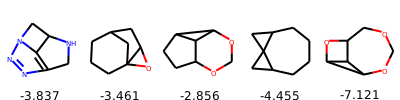

In [52]:
path = 'results/qm9_datatest_5_13/'
# head = ['smile_new', 'prop_new', 'sim', 'smile_old', 'qed_old', 'plogp_old', 'plogp_delta']
# plogp_discovered_sorted.csv
qed = pd.read_csv(path + 'plogp_constrain_optimization.csv')
qed['total'] = abs(qed['sim'] * qed['plogp_delta'])
qed = qed.sort_values(by='total', ascending=False)
mols = list(qed['smile_new'])
mols = [Chem.MolFromSmiles(mol) for mol in mols]
title = [str(round(s,3)) for s in list(qed['prop_new'])]
img=Draw.MolsToGridImage(mols, legends=title, molsPerRow=5, maxMols=5, subImgSize=(80,100))
img

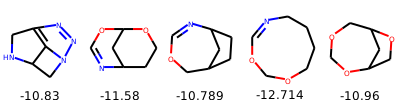

In [53]:
mols = list(qed['smile_old'])
mols = [Chem.MolFromSmiles(mol) for mol in mols]
title = [str(round(s,3)) for s in list(qed['plogp_old'])]
img=Draw.MolsToGridImage(mols, legends=title, molsPerRow=5, maxMols=5, subImgSize=(80,100))
img

In [54]:
qed

,smile_new,prop_new,sim,smile_old,qed_old,plogp_old,plogp_delta,total
95,C1NC2Cn3nnc1c32,-3.837056,1.000000,C1C2NCC3=C2N1N=N3,0.501078,-10.829545,6.992488,6.992488
69,C1CC2CC3OC3(C1)C2,-3.460814,0.173913,C1CC2CC(O1)OC=N2,0.475449,-11.579627,8.118813,1.411968
99,C1OC2CCC3C(O1)C23,-2.856111,0.173913,C1CC2CC1COC=N2,0.476606,-10.788865,7.932754,1.379609
31,C1CCC2CC23CC3C1,-4.455038,0.148936,C1CCN=COCOC1,0.484027,-12.714251,8.259213,1.230096
85,C1OCC2OC3C(O1)C23,-7.121367,0.317073,C1OC2CC1OCOC2,0.466805,-10.960306,3.838939,1.217225
...,...,...,...,...,...,...,...,...
58,C=CC=C1NC12C1OC12,-4.593338,0.019608,O1C=CC=CN=CN=C1,0.518505,-11.703417,7.110080,0.139413
62,CC=NC=C1NC12CN2,-5.213410,0.019608,N1C=CC=NC=CN=C1,0.554354,-11.646755,6.433345,0.126144
40,C1CN2CC23CN3CN1,-8.817494,0.018868,N1C=CN=CN=CN=C1,0.538904,-12.516388,3.698894,0.069790
52,CC=NCN1C2CCC21,-2.691865,0.000000,O1C=CC=NC=NC=C1,0.518505,-11.811319,9.119454,0.000000


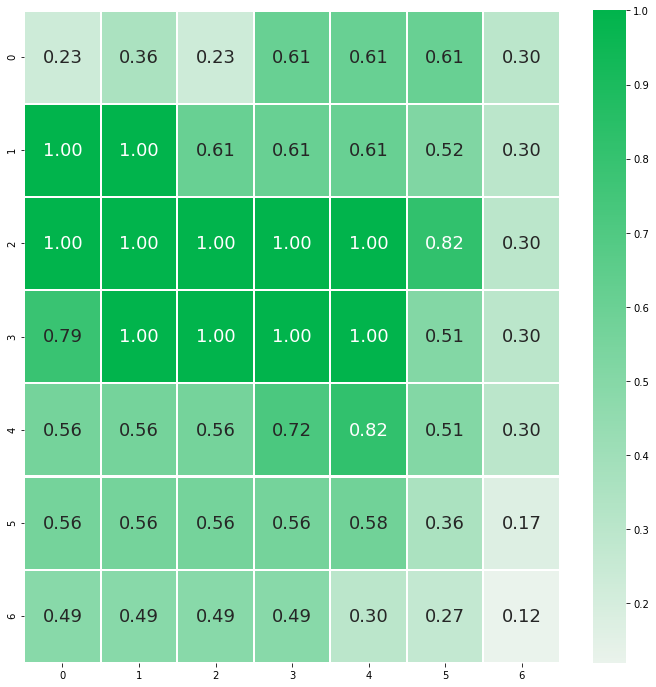

In [53]:
# (12.4, .4)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = 'results/zinc250k_datatest_5_15/generated/generated_interpolation-grid_molecules_seed21legend.txt'
a = []
with open(path, 'r') as f:
    for line in f:
        a.append(float(line.strip()))
a = np.array(a).reshape((7,7))
df = pd.DataFrame(a,columns=[x for x in 'abcdefg'])
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(a, annot=True, fmt=".2f", linewidths=1.2, ax=ax, annot_kws={"size": 18}, cmap=sns.light_palette('#01b44c', as_cmap=True))
plt.show()

# a = []
# path = 'results/zinc250k_datatest_5_15/generated/generated_interpolation-grid_molecules_seed21legend.txt'
# with open(path, 'r') as f:
#     for line in f:
#         a.append(float(line.strip()))
# a = np.array(a).reshape((7,7))
# idx = 0
# for idx in range(7):
#     n = len(a[idx])
#     aa = np.array(a[idx])
#     aa = np.expand_dims(aa, axis=0)
#     # aa = np.repeat(a, n, axis=0)
#     fig, ax = plt.subplots(figsize=(14.4, .8))
#     ax = sns.heatmap(aa, annot=True, fmt=".2f", linewidths=.5, ax=ax, annot_kws={"size": 18}, cbar=False,
#                          xticklabels=False, yticklabels=False, vmin=0, vmax=1,
#                      cmap=sns.light_palette('#01b44c', as_cmap=True)) #cmap=plt.get_cmap('Greens')
#     fig.savefig('heatmap/heat' + str(idx) + '.png')
# plt.show()

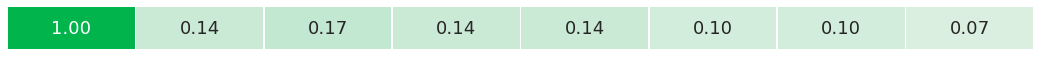

In [72]:
# aa = [1.00, 0.63, 0.38, 0.30, 0.04, 0.07, 0.03, 0.07, 0.24]
# bb = [1.00, 0.45,0.36,0.14,0.08,0.08,0.09,0.16,0.23]
# cc = []
# cc.append(aa)
# cc.append(bb)
# cc = np.array(cc)
# df = pd.DataFrame(cc,columns=[x for x in 'abcdefghi'])
# fig, ax = plt.subplots(figsize=(12, 4))
# ax = sns.heatmap(cc, annot=True, fmt=".2f", linewidths=0.5, ax=ax, annot_kws={"size": 18}, cmap=sns.light_palette('#01b44c', as_cmap=True))
# plt.show()

# aa = [1.00,0.21,0.21,0.17,0.09,0.12,0.07,0.07]
aa = [1.00,0.14,0.17,0.14,0.14,0.10,0.10,0.07]
aa = np.expand_dims(aa, axis=0)
# aa = np.repeat(a, n, axis=0)
fig, ax = plt.subplots(figsize=(18.4, .8))
ax = sns.heatmap(aa, annot=True, fmt=".2f", linewidths=.5, ax=ax, annot_kws={"size": 18}, cbar=False,
                     xticklabels=False, yticklabels=False, vmin=0, vmax=1,
                 cmap=sns.light_palette('#01b44c', as_cmap=True)) 
fig.savefig('heatmap/heatint2point/' + str(0) + '.png')
plt.show()